<a href="https://colab.research.google.com/github/aquapathos/Demo/blob/master/YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[YOLOv5 Tutorial](https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb#scrollTo=wbvMlHd_QwMG) ができるか試してみる

In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0 _CudaDeviceProperties(name='Quadro M4000', major=5, minor=2, total_memory=8126MB, multi_processor_count=13)


# 1. Inference

[Errno 2] No such file or directory: 'yolov5'
/storage/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
Using torch 1.7.0 CUDA:0 (Quadro M4000, 8126MB)

Fusing layers... 
Model Summary: 232 layers, 7459581 parameters, 0 gradients
image 1/3 /storage/yolov5/data/images/17nezumi1o01_lCut.png: 640x512 1 birds, Done. (0.021s)
image 2/3 /storage/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 buss, 1 skateboards, Done. (0.020s)
image 3/3 /storage/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.018s)
Results saved to runs/detect/exp4
Done. (0.259s)


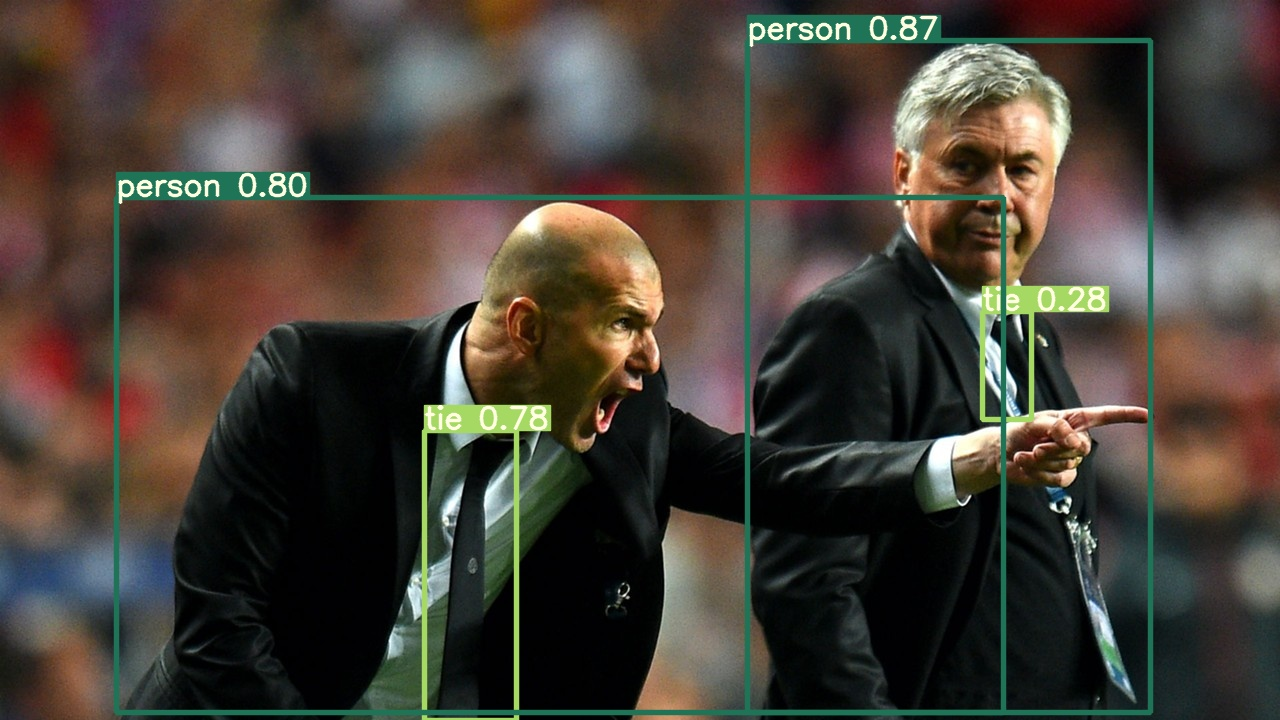

In [ ]:
%cd yolov5
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

# 2. Test 
容量的にむりなので飛ばす

# 3. Train


In [ ]:
# Download COCO128
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --nosave --cache

Using torch 1.7.0 CUDA:0 (Quadro M4000, 8126MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='./data/coco128.yaml', device='', epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate

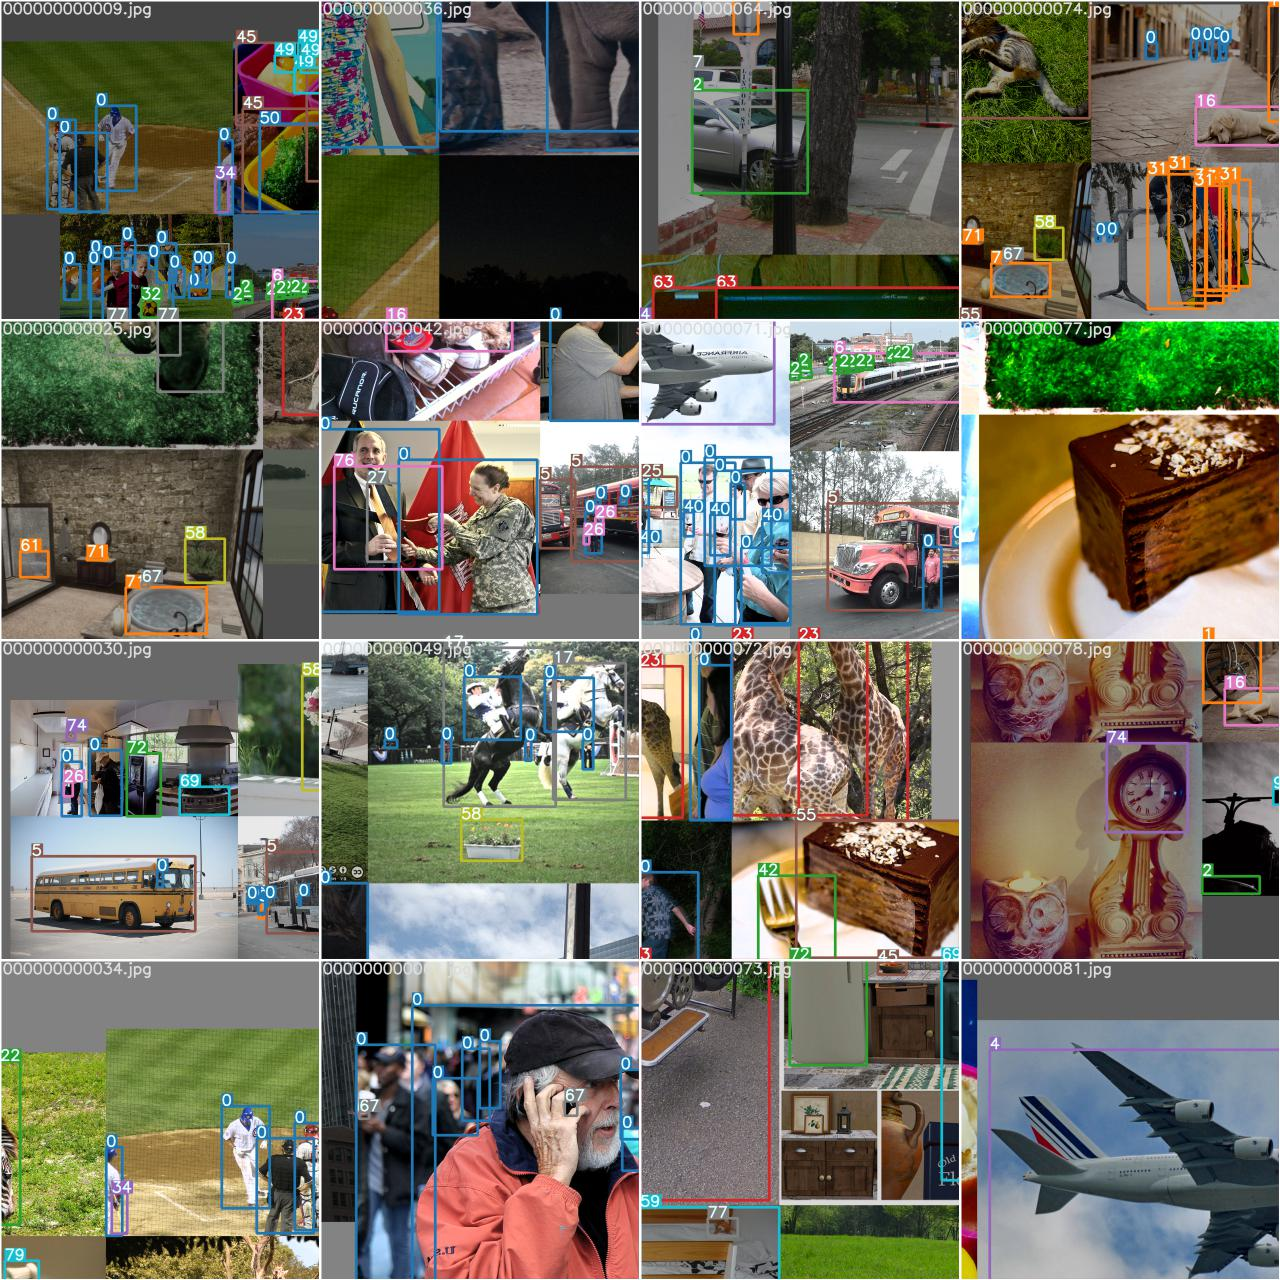

In [ ]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

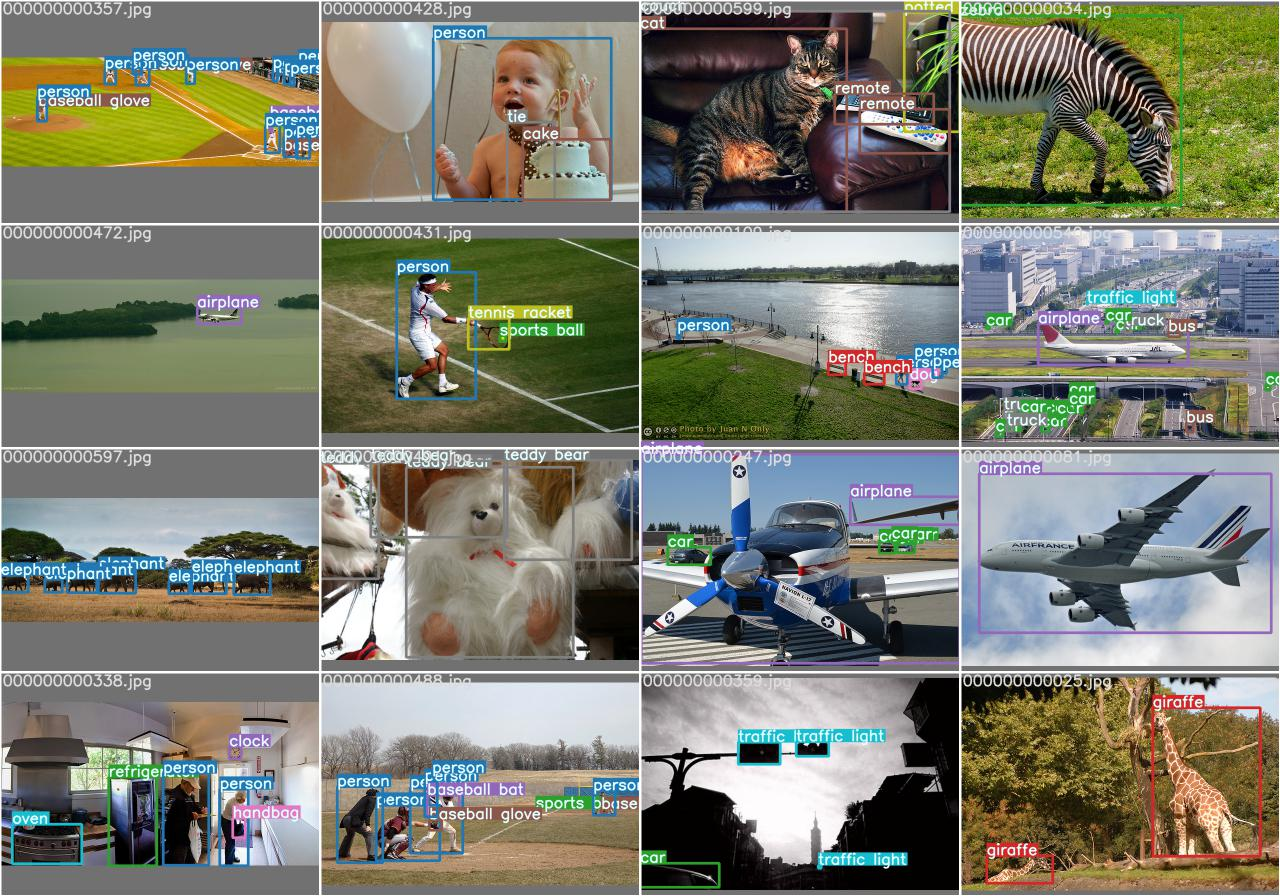

In [ ]:
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels

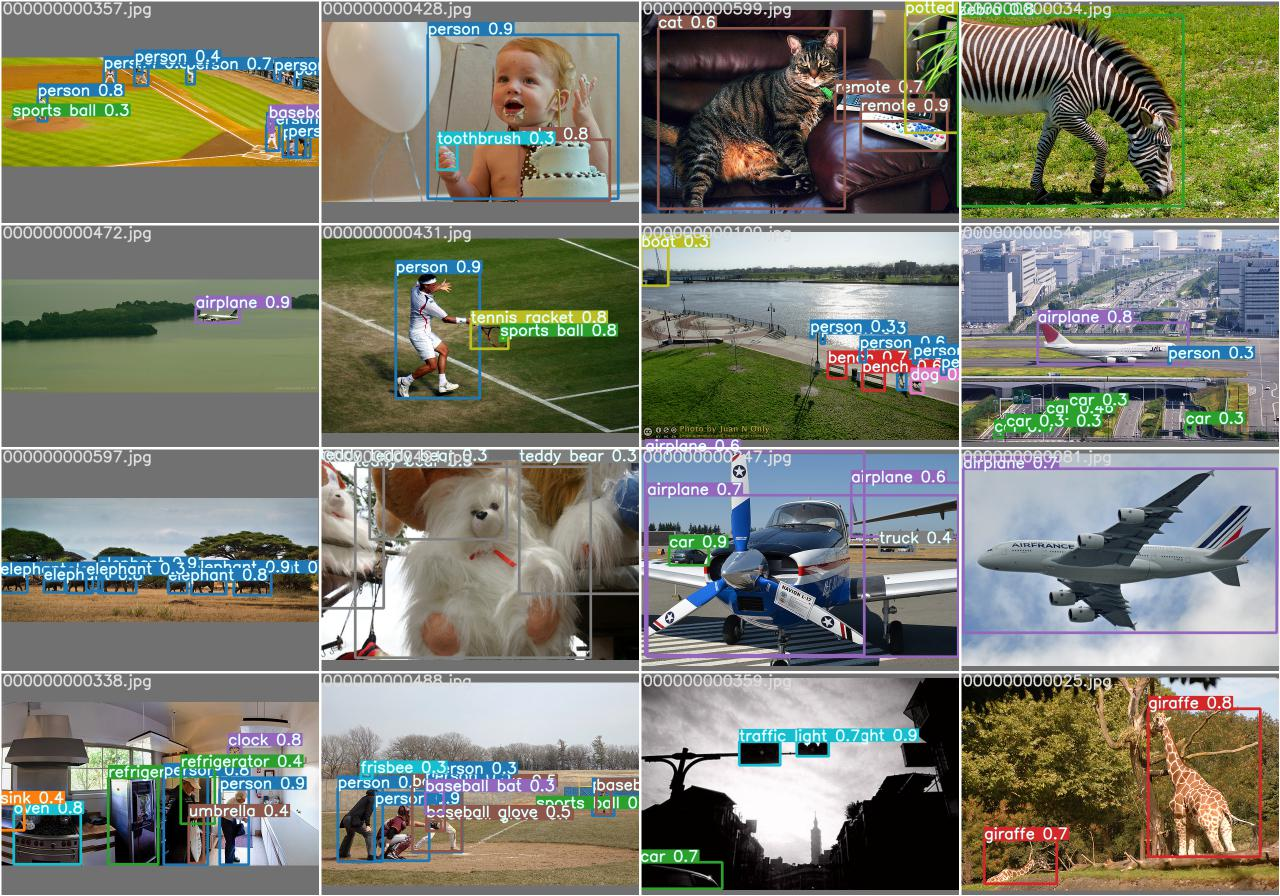

In [ ]:
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

# Radish

In [ ]:
!python train.py --img 416 --batch 16 --epochs 30 --data radishdata.yaml --cfg yolov5x.yaml --weights yolov5x.pt --nosave --cache

Using torch 1.7.0 CUDA:0 (Quadro M4000, 8126MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='radishdata.yaml', device='', epochs=30, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp2', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5x.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degree

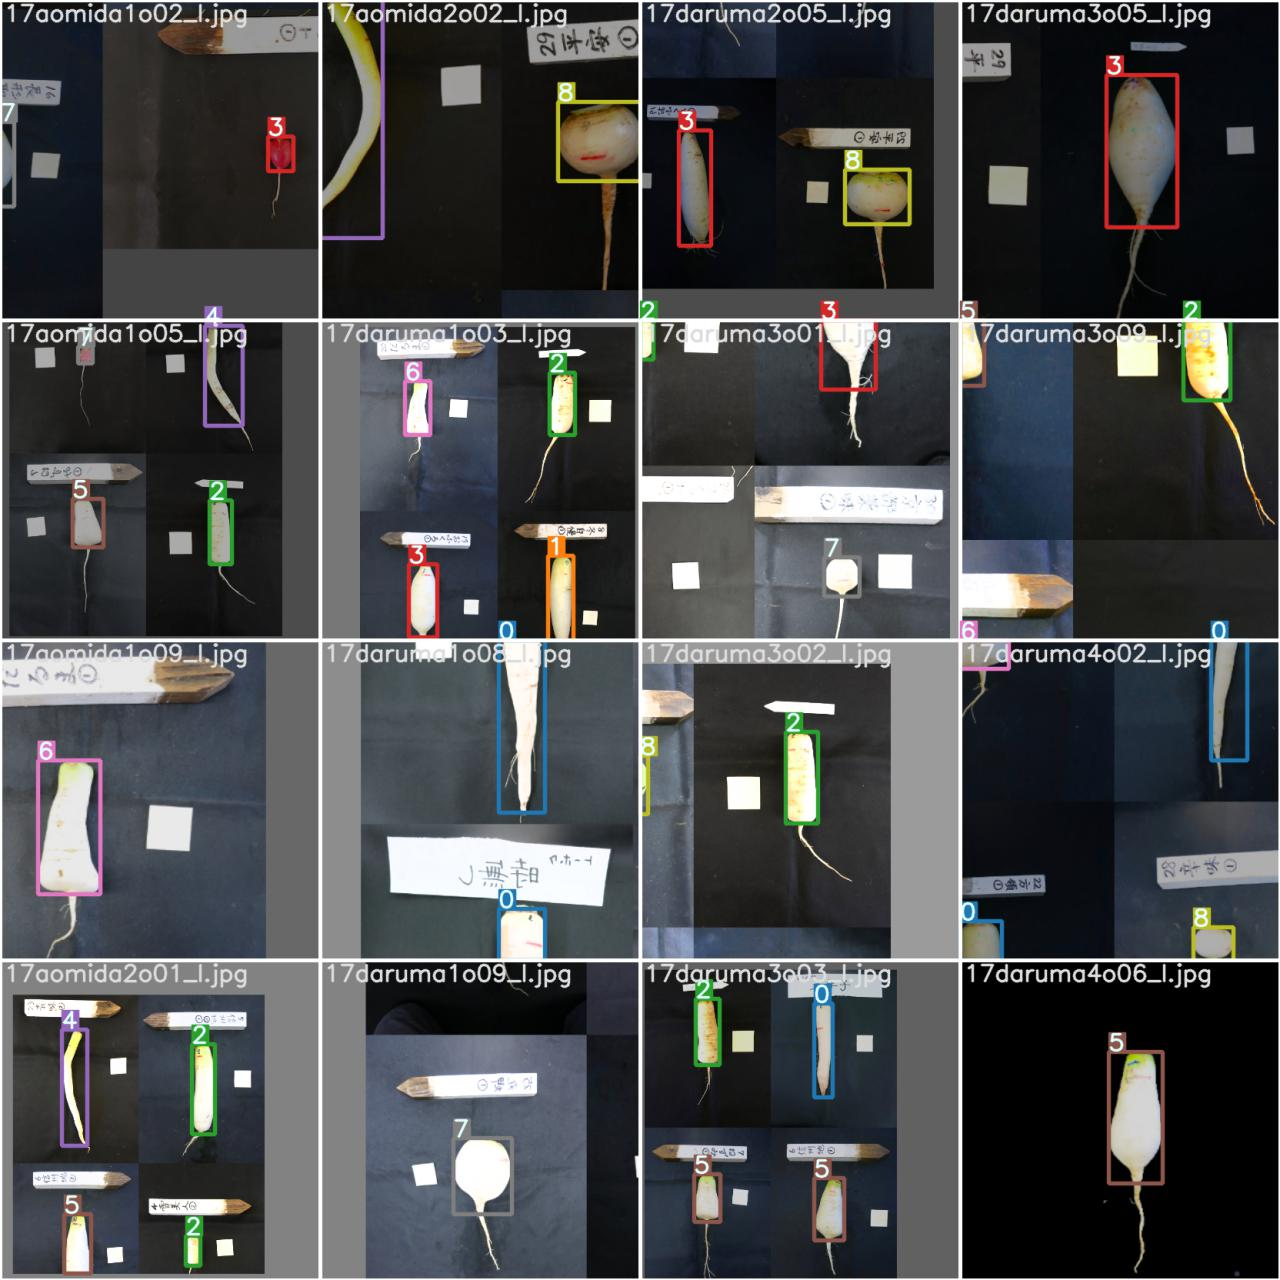

In [ ]:
Image(filename='runs/train/exp2/train_batch0.jpg', width=800)  # 学習データ

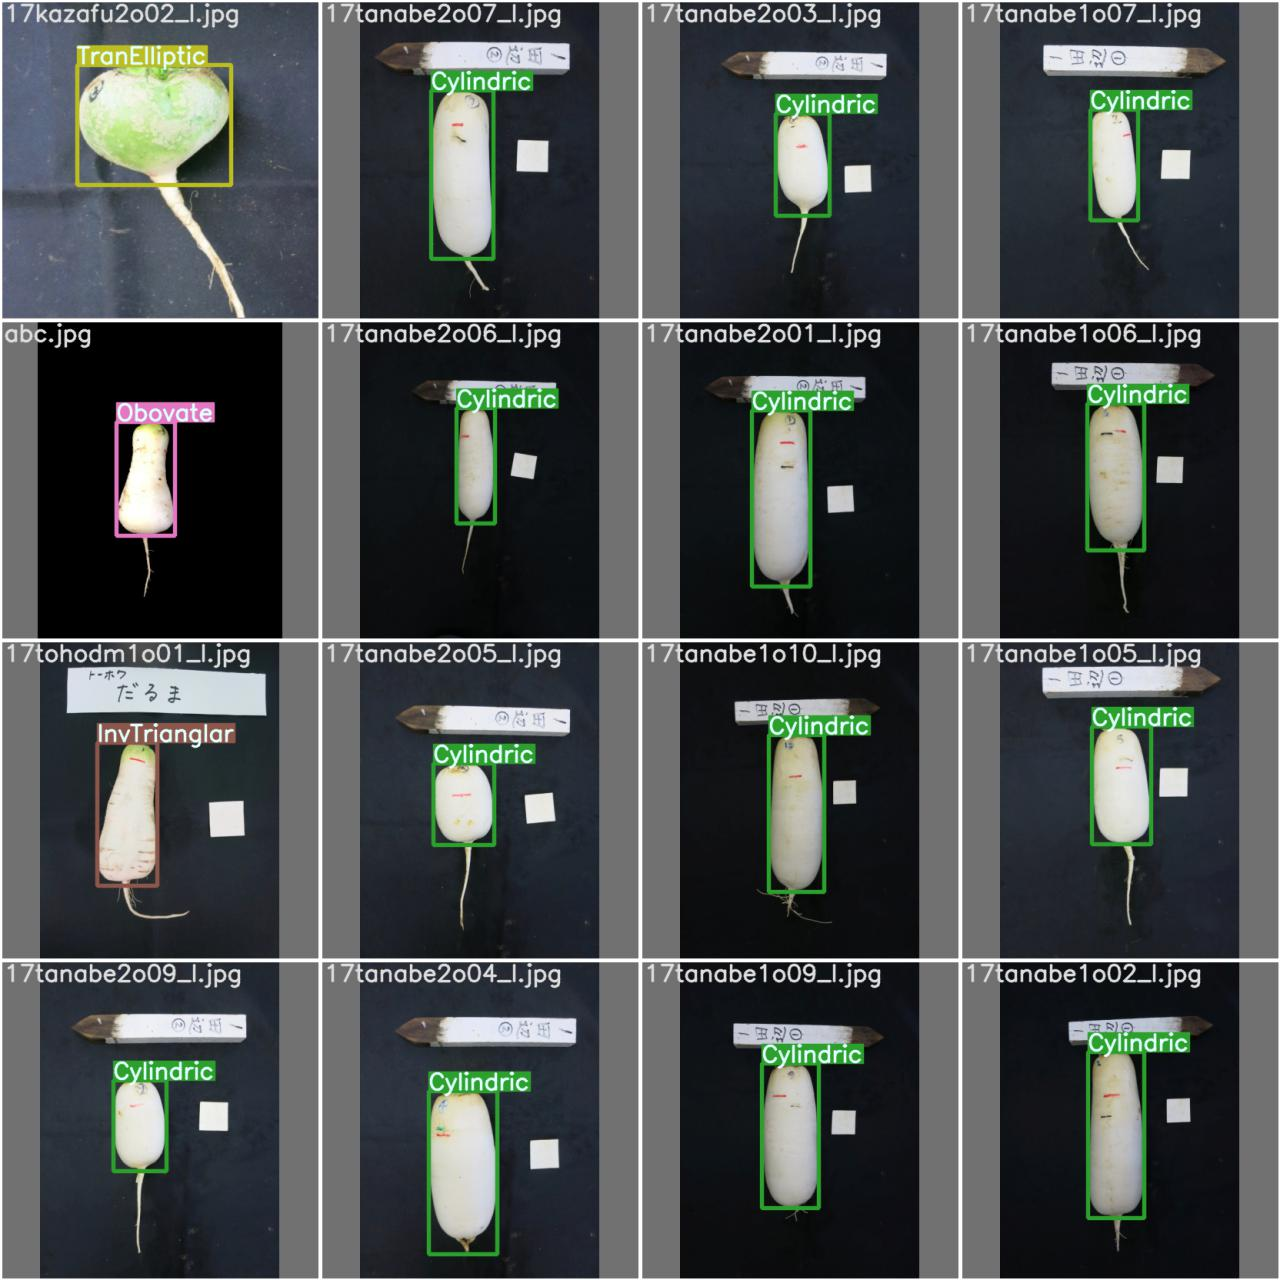

In [ ]:
Image(filename='runs/train/exp2/test_batch0_labels.jpg', width=800)  # 検証データ

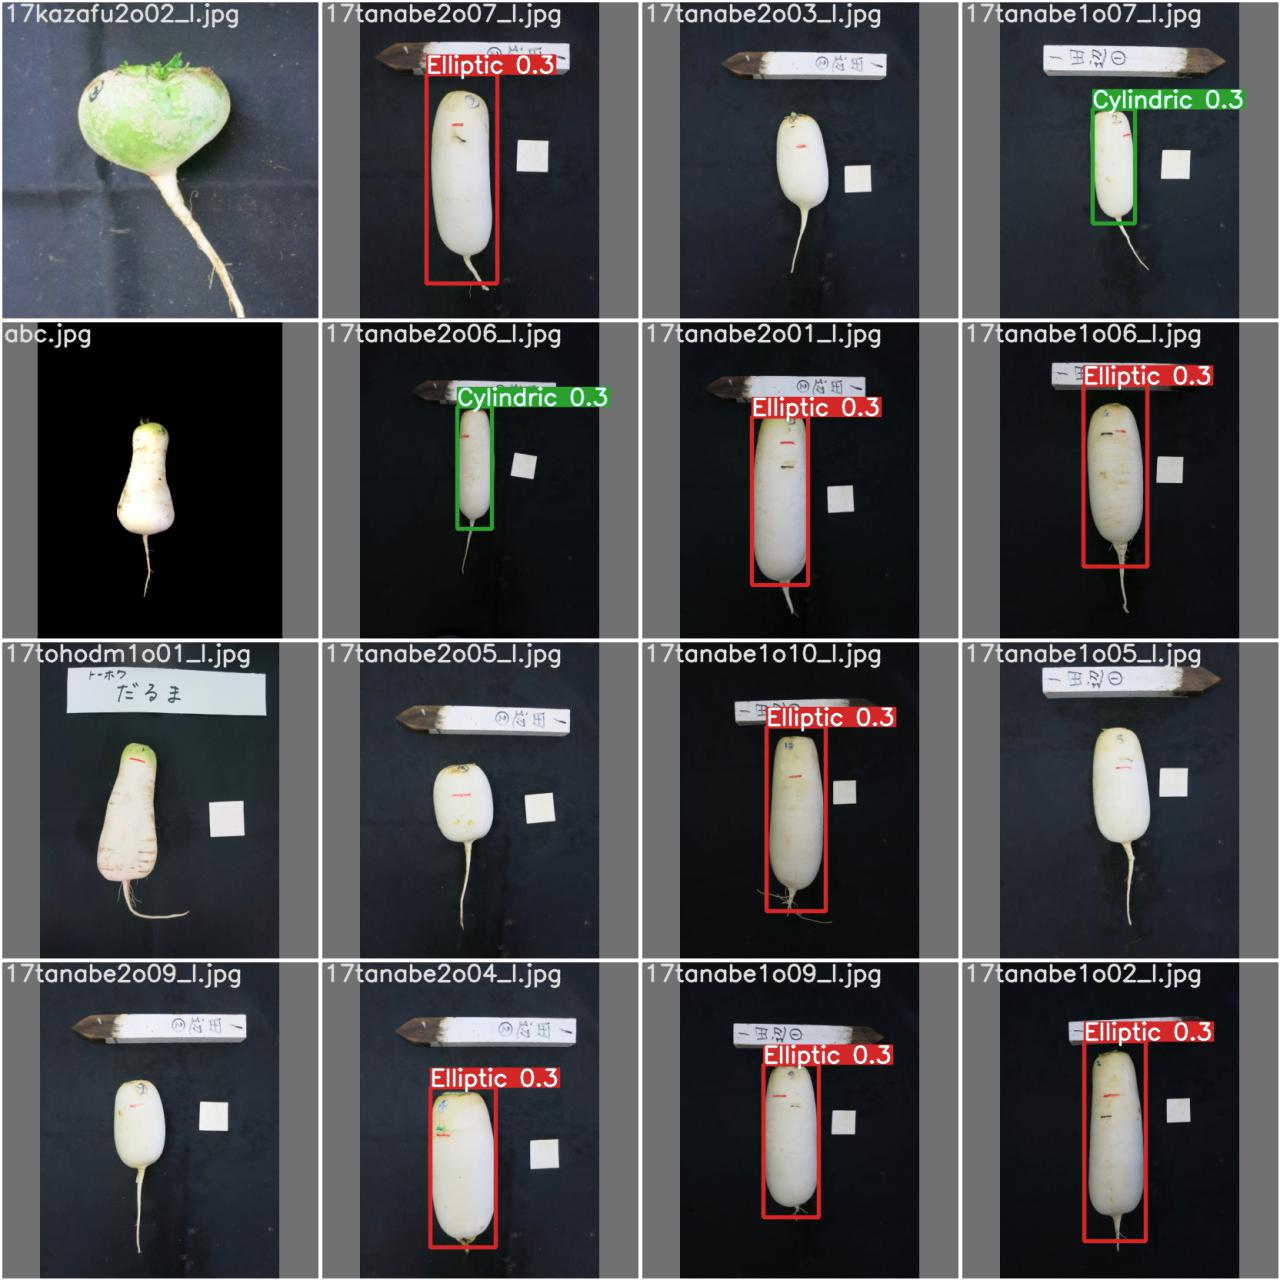

In [ ]:
Image(filename='runs/train/exp2/test_batch0_pred.jpg', width=800)  # 推論結果